# Gerkeli Kütüphanlerin Kurulumu 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya Okuma Ve İlk Gözlem

In [9]:
df = pd.read_csv("AmesHousing.csv")
print("Boyut(Shape): ", df.shape)
df.head()

Boyut(Shape):  (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Hedef Değişken ve Eksik değişkenlerin Belirlenmesi

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


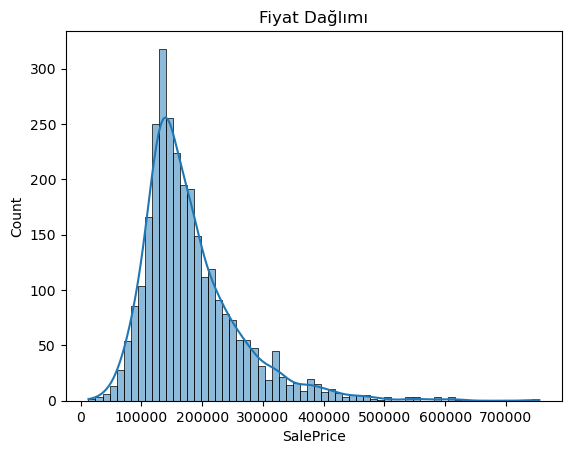

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
dtype: int64

In [13]:
print(df["SalePrice"].describe().T)
sns.histplot(df["SalePrice"], kde=True)
plt.title("Fiyat Dağlımı")
plt.show()

missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(15)

In [16]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [36]:
## Çok Fazla Sütun olduğu için sadece bize lazım olan sütunlarla işlem yapıyoruz 
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Full Bath', 'Year Built', 'Neighborhood']
df = df[features + ['SalePrice']] # features(Özellikler) ve SalePrice ile farklı bir Dataframe oluşturduk

df = df.dropna() # Eksik değerlerin silinmesi

# Kontroller
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Overall Qual  2929 non-null   int64  
 1   Gr Liv Area   2929 non-null   int64  
 2   Garage Cars   2929 non-null   float64
 3   Full Bath     2929 non-null   int64  
 4   Year Built    2929 non-null   int64  
 5   Neighborhood  2929 non-null   object 
 6   SalePrice     2929 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 183.1+ KB


Overall Qual    0
Gr Liv Area     0
Garage Cars     0
Full Bath       0
Year Built      0
Neighborhood    0
SalePrice       0
dtype: int64

# 2. Aşama: Veriyi Modelleme İçin Hazırlama (Feature Encoding + Split)

* train_test_split: Veri setini eğitim ve test setine ayırmak için kullanılır. Eğitim setiyle model öğrenir, test setiyle modelin ne kadar doğru tahmin yaptığını değerlendiririz.
* LinearRegression: Sklearn içindeki doğrusal regresyon modelidir. Ev fiyatları gibi sayısal bir değişkeni tahmin etmek için uygundur.
* mean_squared_error: Gerçek değerlerle tahmin edilen değerler arasındaki farkların karesini alıp ortalamasını verir. Ne kadar küçükse, model o kadar iyi demektir.
* r2_score: Modelin başarı oranını gösteren istatistiksel bir ölçüdür. 1’e ne kadar yakınsa, model o kadar iyi açıklama gücüne sahiptir.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

## Hedef Ve Özellikleri Ayır

In [23]:
x = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]

## Eğitim/Test Setine Bölme

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42
)

## Pipeline ile Tüm Süreci Otomatikleştir
* Pipeline Ne İşe Yarar?
  Veriyi önce işler (encoding),

Sonra modele gönderir (regression),

Tüm işlemi tek satırda yönetebiliriz.

Tekrar tekrar çalıştırırken kolaylık sağlar.

In [29]:
# Kategorik sütunlar
cat_cols = ["Neighborhood"]


# Sayısal olanlar otomatik geçer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder="passthrough", force_int_remainder_cols=False
)

# Pipeline: önce dönüştür, sonra regresyon yap
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

# Eğit
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Neighborhood'])])),
                ('regressor', LinearRegression())])

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tahmin
y_pred = model.predict(x_test)

# Değerlendirme metrikleri
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

MAE : 22165.076704266172
RMSE: 36815.783072414895
R²  : 0.8201210651819579


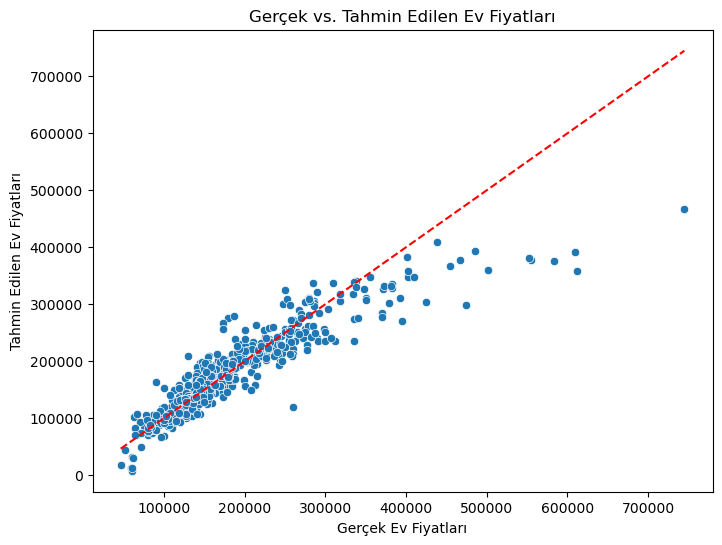

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Ev Fiyatları")
plt.title("Gerçek vs. Tahmin Edilen Ev Fiyatları")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

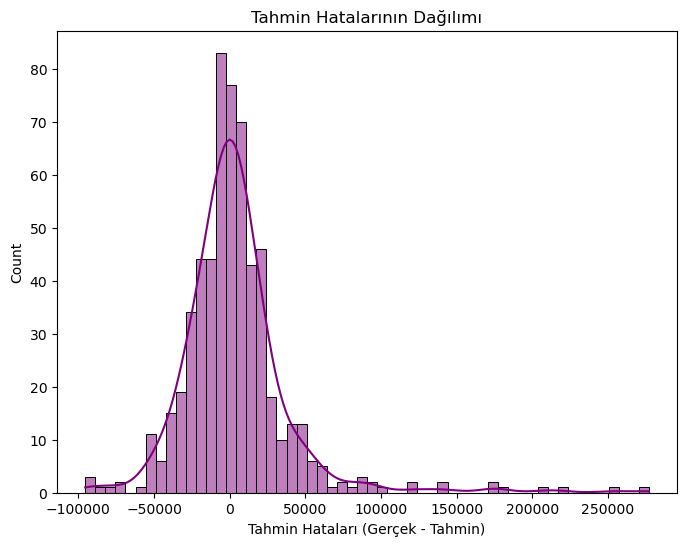

In [33]:
hatalar = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(hatalar, kde=True, color="purple")
plt.xlabel("Tahmin Hataları (Gerçek - Tahmin)")
plt.title("Tahmin Hatalarının Dağılımı")
plt.show()

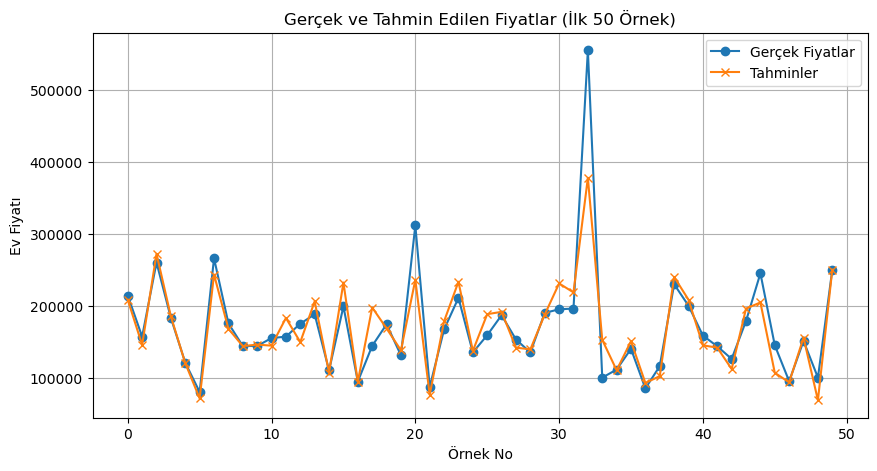

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Gerçek Fiyatlar', marker='o')
plt.plot(y_pred[:50], label='Tahminler', marker='x')
plt.title("Gerçek ve Tahmin Edilen Fiyatlar (İlk 50 Örnek)")
plt.xlabel("Örnek No")
plt.ylabel("Ev Fiyatı")
plt.legend()
plt.grid(True)
plt.show()

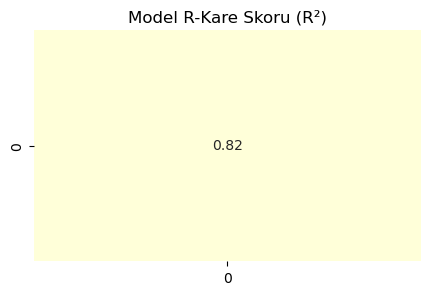

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap([[r2]], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f")
plt.title("Model R-Kare Skoru (R²)")
plt.show()